  # Task 4 
As a security/defense analyst, we need to find out the hot zone of terrorism.

We can choose any of the following tools. For this task I will be using python  

(Python/R/Tableau/PowerBI/Excel/SAP/SAS)




By - Siddharth Agarwal




In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
data.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,31,33,60,61,62,76,79,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(25487, 135)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
data.shape

(29975, 135)

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
eventid,29975.0,1.980791e+11,1.214180e+09,198.0,1.979013e+11,1.981121e+11,1.984071e+11,1.987012e+11
iyear,29974.0,1.980792e+03,4.065549e+00,1970.0,1.979000e+03,1.981000e+03,1.984000e+03,1.987000e+03
imonth,29974.0,6.350404e+00,3.398355e+00,0.0,3.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
iday,29974.0,1.517595e+01,8.881986e+00,0.0,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,29974.0,1.661440e-02,1.278237e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,644.0,1.052019e+01,3.593122e+01,-99.0,1.000000e+00,1.000000e+00,3.000000e+00,3.900000e+02
INT_LOG,29974.0,-3.280943e+00,4.422357e+00,-9.0,-9.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,29974.0,-3.235337e+00,4.477072e+00,-9.0,-9.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,29974.0,1.812905e-01,7.640818e-01,-9.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [9]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [12]:
cols = [i for i in data.columns]
cols

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [13]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude',
    'longitude':'Longitude','summary':'Summary','attacktype1_txt':'attackType','targtype1_txt':'targetType','weaptype1_txt':'Weapon','nkill':'Kill',
     'nwound':'Wound'},inplace=True)


In [14]:
data_1 = data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',"attackType",'Kill',
               'Wound','target1','Summary','Group','targetType','Weapon','motive']]
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29975 entries, 0 to 29974
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        29974 non-null  float64
 1   Month       29974 non-null  float64
 2   Day         29974 non-null  float64
 3   Country     29974 non-null  object 
 4   State       29855 non-null  object 
 5   Region      29974 non-null  object 
 6   City        29974 non-null  object 
 7   Latitude    28397 non-null  float64
 8   Longitude   28397 non-null  float64
 9   attackType  29974 non-null  object 
 10  Kill        24447 non-null  float64
 11  Wound       22698 non-null  float64
 12  target1     29616 non-null  object 
 13  Summary     1092 non-null   object 
 14  Group       29974 non-null  object 
 15  targetType  29974 non-null  object 
 16  Weapon      29974 non-null  object 
 17  motive      821 non-null    object 
dtypes: float64(7), object(11)
memory usage: 4.1+ MB


In [15]:
data_1.isnull().sum()

Year              1
Month             1
Day               1
Country           1
State           120
Region            1
City              1
Latitude       1578
Longitude      1578
attackType        1
Kill           5528
Wound          7277
target1         359
Summary       28883
Group             1
targetType        1
Weapon            1
motive        29154
dtype: int64

In [17]:
data_1.shape

(29975, 18)

In [22]:
data_2 = data_1['City'].value_counts().to_frame().drop('Unknown')
data_2 = data_2.sort_values('City',axis=0,ascending=False).iloc[0:10]

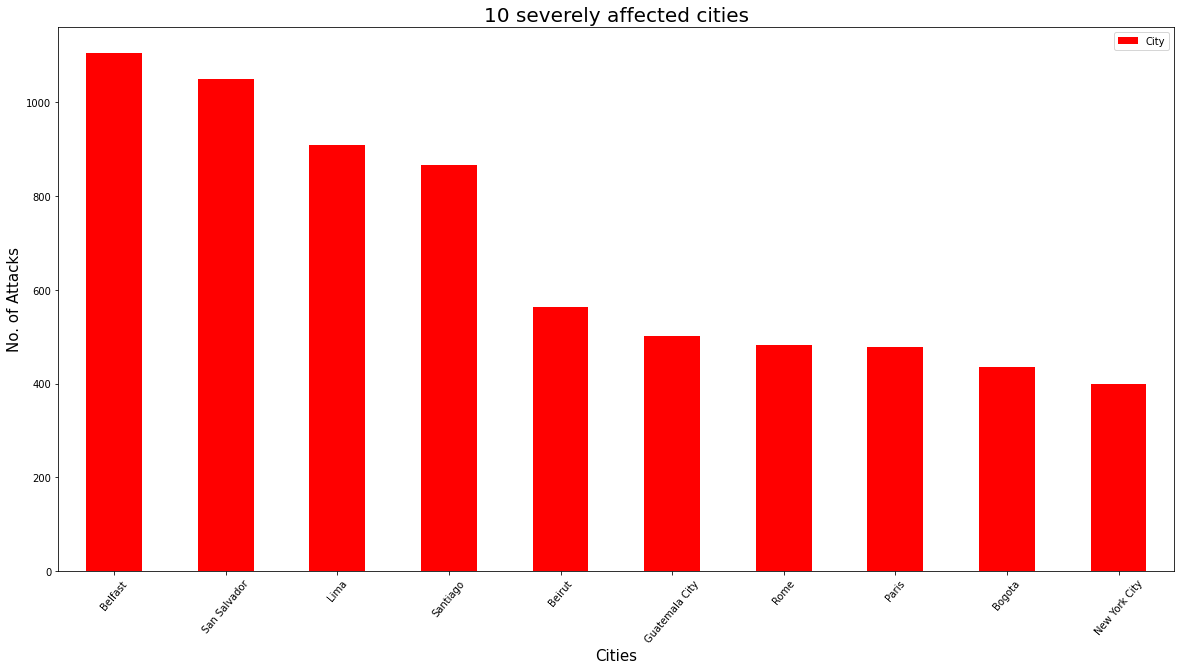

In [27]:
data_2.plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("Cities",fontsize=15)
plt.ylabel("No. of Attacks",fontsize=15)
plt.title("10 severely affected cities",fontsize=20)
plt.show()

## Conclusion - These are the top 10 cities with most attacks

In [28]:
data_1.columns

Index(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
       'Latitude', 'Longitude', 'attackType', 'Kill', 'Wound', 'target1',
       'Summary', 'Group', 'targetType', 'Weapon', 'motive'],
      dtype='object')

In [30]:
data_3 = data_1['Region'].value_counts().to_frame()
data_3 = data_3.sort_values('Region',axis=0,ascending=False).iloc[0:10]

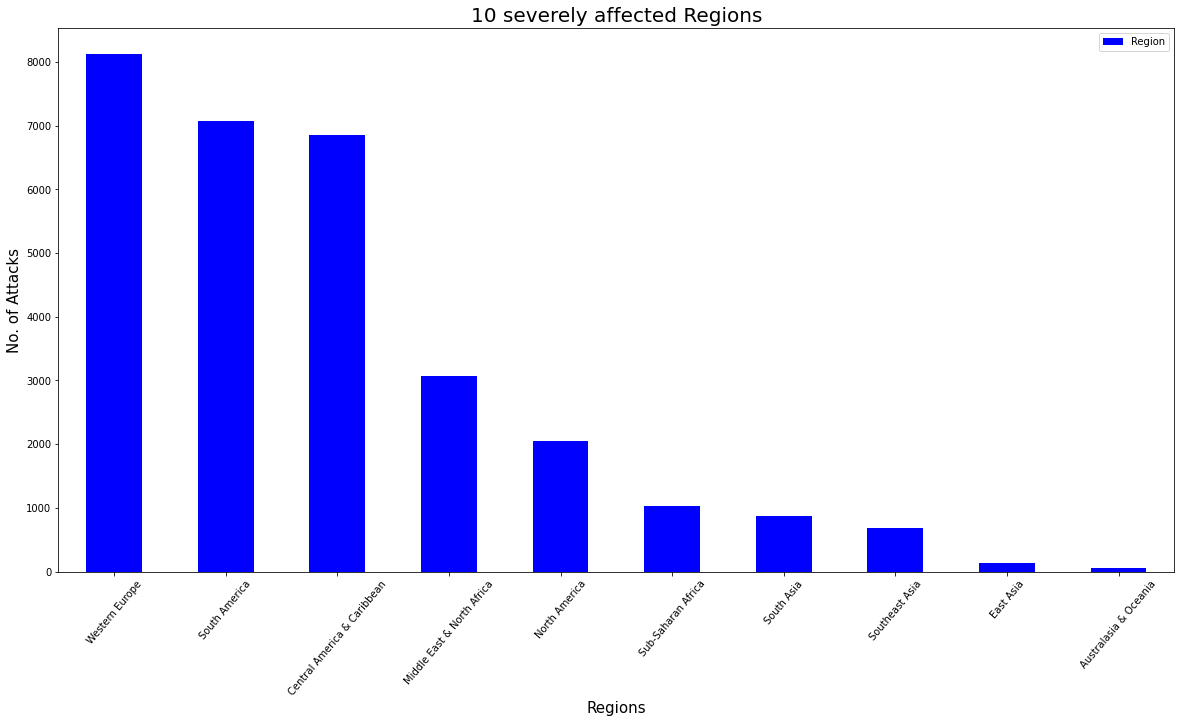

In [33]:
data_3.plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("Regions",fontsize=15)
plt.ylabel("No. of Attacks",fontsize=15)
plt.title("10 severely affected Regions",fontsize=20)
plt.show()

Conclusion - These are the most attacked regions

In [35]:
data_1.columns

Index(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
       'Latitude', 'Longitude', 'attackType', 'Kill', 'Wound', 'target1',
       'Summary', 'Group', 'targetType', 'Weapon', 'motive'],
      dtype='object')

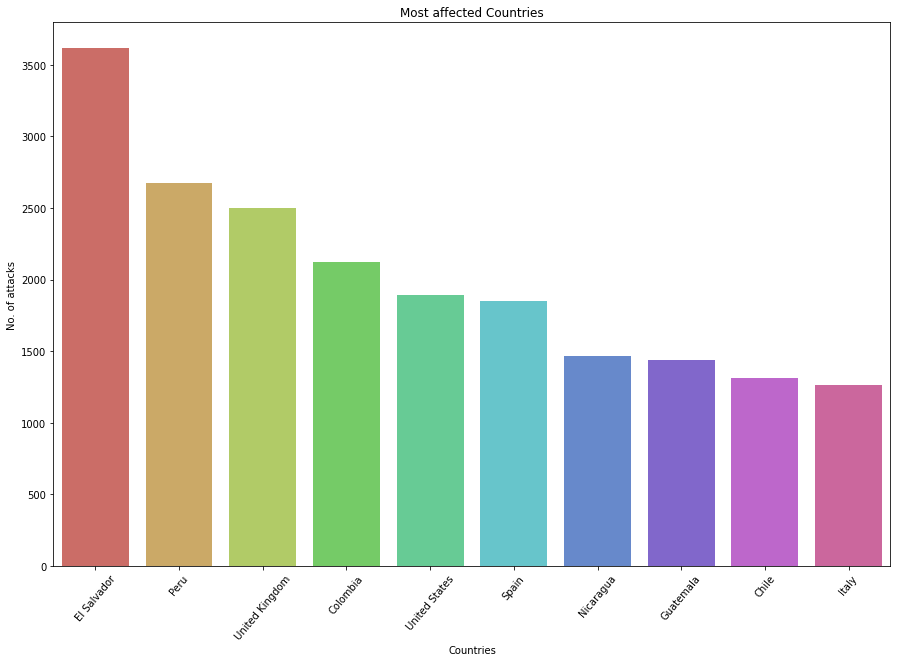

In [44]:
plt.subplots(figsize=(15,10))
sns.barplot(data_1['Country'].value_counts()[:10].index,data_1['Country'].value_counts()[:10] , palette='hls')
plt.title('Most affected Countries')
plt.xlabel('Countries')
plt.ylabel('No. of attacks')
plt.xticks(rotation = 50)
plt.show()

Conclusion - These are the most attacked countries

In [45]:
data_1.columns

Index(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
       'Latitude', 'Longitude', 'attackType', 'Kill', 'Wound', 'target1',
       'Summary', 'Group', 'targetType', 'Weapon', 'motive'],
      dtype='object')

In [47]:
data_4 = data_1[['Group','Kill']].groupby(['Group'],axis=0).sum().drop('Unknown')
data_4 = data_4.sort_values('Kill',ascending=False).head(10)

In [48]:
data_4

,Kill
Group,
Nicaraguan Democratic Force (FDN),6428.0
Farabundo Marti National Liberation Front (FMLN),6280.0
Shining Path (SL),5584.0
Democratic Revolutionary Alliance (ARDE),1803.0
Irish Republican Army (IRA),1401.0
Revolutionary Armed Forces of Colombia (FARC),1285.0
M-19 (Movement of April 19),1260.0
Tamils,976.0
New People's Army (NPA),901.0


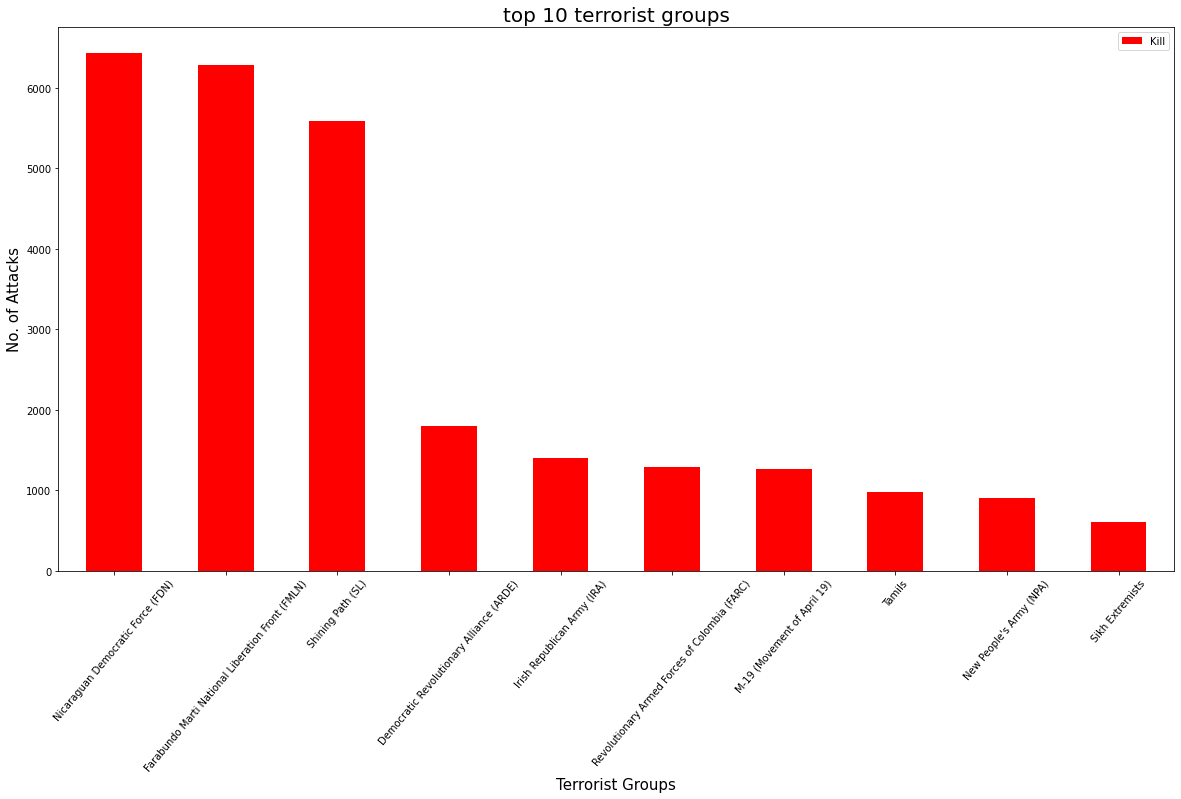

In [49]:
data_4.plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("Terrorist Groups",fontsize=15)
plt.ylabel("No. of Attacks",fontsize=15)
plt.title("top 10 terrorist groups",fontsize=20)
plt.show()

Conclusion - These are the most dangerous terrorist groups

In [50]:
data_1.columns

Index(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
       'Latitude', 'Longitude', 'attackType', 'Kill', 'Wound', 'target1',
       'Summary', 'Group', 'targetType', 'Weapon', 'motive'],
      dtype='object')

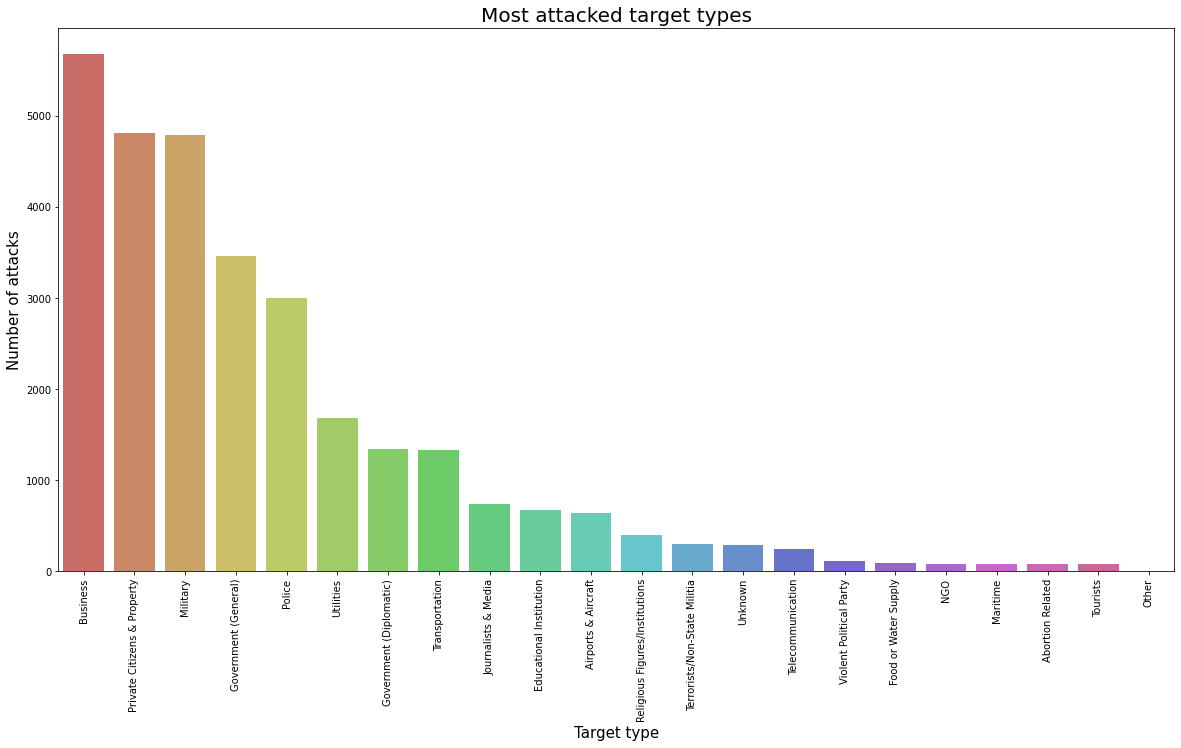

In [51]:
plt.subplots(figsize=(20,10))
sns.countplot(data_1["targetType"],order=data_1['targetType'].value_counts().index,palette="hls");
plt.xticks(rotation=90)
plt.xlabel("Target type",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Most attacked target types",fontsize=20)
plt.show()

Conclusion - These are the most targeted groups.

In [52]:
data_5 = data_1['attackType'].value_counts()

In [53]:
data_5

Bombing/Explosion                      13597
Armed Assault                           6303
Assassination                           4893
Facility/Infrastructure Attack          2151
Hostage Taking (Kidnapping)             1319
Unknown                                 1067
Hostage Taking (Barricade Incident)      442
Hijacking                                149
Unarmed Assault                           53
Name: attackType, dtype: int64

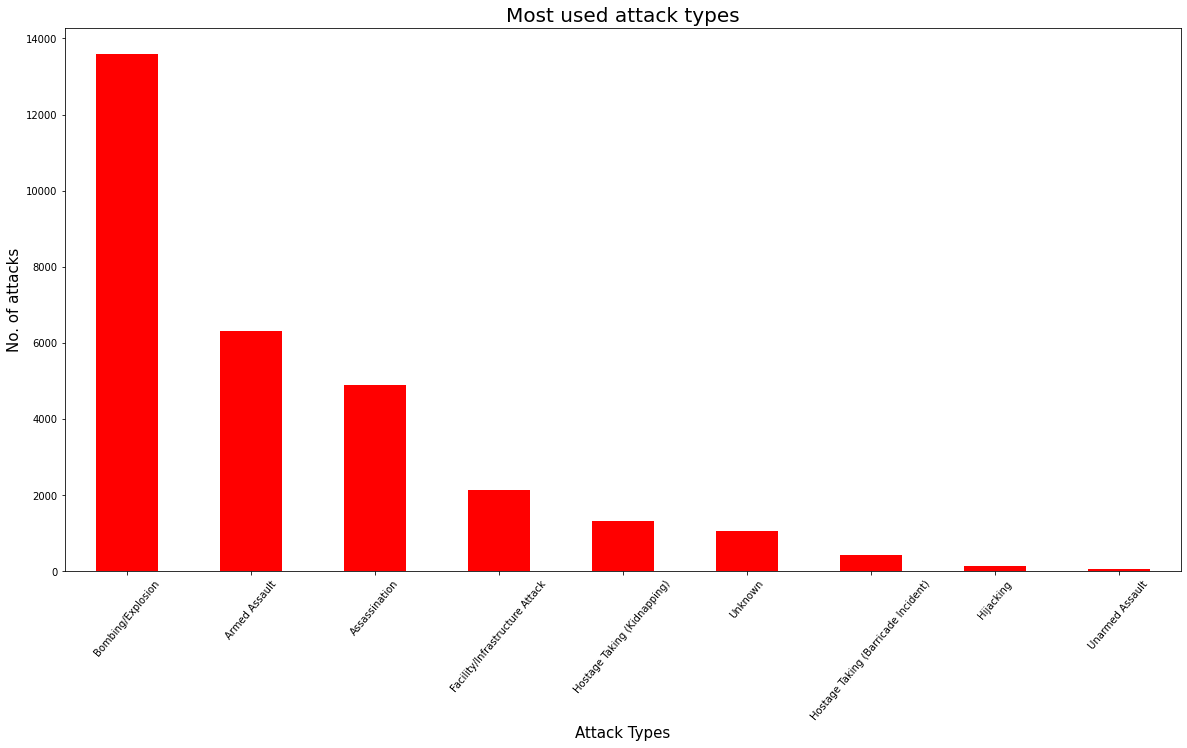

In [54]:
data_5.plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("Attack Types",fontsize=15)
plt.ylabel("No. of attacks",fontsize=15)
plt.title("Most used attack types",fontsize=20)
plt.show()

Conclusion - These are the most preferred attack types 